# What happens in the hidden layers

在這個例子中，我們透過實例展示 hidden layer 以及 activation function 對資料的影響。

In this example, we use a concrete example to show the impact of the activation function.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('nonlinear.csv')
df.head()

,x1,x2,v,y
0,0.285507,0.762016,0.444687,1
1,0.691304,1.052087,0.409877,1
2,0.389855,1.122411,0.307517,1
3,0.818841,0.189366,0.604794,0
4,0.413043,1.007135,0.286395,1


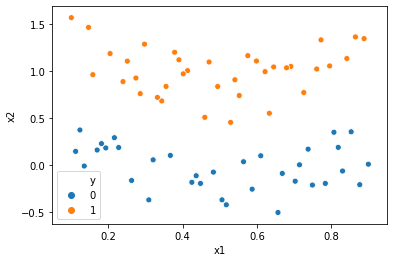

In [7]:
sns.scatterplot(x=df.x1, y=df.x2, hue=df.y)

In [ ]:
%tensorflow_version 2.x

In [24]:
import tensorflow
from tensorflow import keras

In [25]:
x = df[['x1', 'x2']]
y = df[['y']]

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Build the neural network

The follow codes construct a neural network shown in the following graph.

下面的程式碼建構了下圖中所展示的神經網路。  
![](dnn_networks.png)

In [28]:
model = keras.models.Sequential()
#first input layer
model.add(keras.layers.Dense(2, input_dim=2, activation='sigmoid'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


``keras.models.Sequential()`` constructs a linear stack of layers.  
``Dense`` means a fully-connected layer.  
The network contains 1 hidden layer, 3 neurons, $(2\times 2) + (2\times 1) + 3 = 4 + 2 + 3 = 9$ parameters. 
The activation function of the hidden layer is the $sigmoid$ function.  
You can set the activation function to be $relu$ by using ``activation='relu``.

``keras.models.Sequential()`` 會建構一個網路，其包含一序列的「層」 (如下圖所示)  
``Dense``指的是「全連接層」的意思。  
這個網路包含 1 個隱藏層，3 個神經元，$(2\times 2) + (2\times 1) + 3 = 4 + 2 + 3 = 9$ 參數。 
隱藏層所用的 activation function 是 $sigmoid$ function。  
你可以使用 ``activation='relu`` 來將 activation 指定為 $relu$ function。

![](sequential_networks.png)

## Draw the network topology

In [29]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_layer_names=True, show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


## Compile the model

- loss: the loss function of the network. The loss function indicates the objective we want to optimize in the network. 
- optimizer: Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses.
- metrics: How we evaluate the performance of our model.

In [30]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [32]:
model.fit(x, y, epochs=3000)

Train on 70 samples
Epoch 1/3000
70/70 [==============================] - 0s 171us/sample - loss: 0.2133 - accuracy: 0.9714
Epoch 2/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.2131 - accuracy: 0.9714
Epoch 3/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.2130 - accuracy: 0.9714
Epoch 4/3000
70/70 [==============================] - 0s 114us/sample - loss: 0.2128 - accuracy: 0.9714
Epoch 5/3000
70/70 [==============================] - 0s 100us/sample - loss: 0.2127 - accuracy: 0.9857
Epoch 6/3000
70/70 [==============================] - 0s 114us/sample - loss: 0.2125 - accuracy: 0.9714
Epoch 7/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.2124 - accuracy: 0.9714
Epoch 8/3000
70/70 [==============================] - 0s 114us/sample - loss: 0.2122 - accuracy: 0.9857
Epoch 9/3000
70/70 [==============================] - 0s 86us/sample - loss: 0.2122 - accuracy: 0.9714
Epoch 10/3000
70/70 [===========================

70/70 [==============================] - 0s 114us/sample - loss: 0.2027 - accuracy: 0.9714
Epoch 79/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.2026 - accuracy: 0.9714
Epoch 80/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.2024 - accuracy: 0.9714
Epoch 81/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.2023 - accuracy: 0.9714
Epoch 82/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.2022 - accuracy: 0.9714
Epoch 83/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.2020 - accuracy: 0.9714
Epoch 84/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.2019 - accuracy: 0.9714
Epoch 85/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.2018 - accuracy: 0.9714
Epoch 86/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.2017 - accuracy: 0.9714
Epoch 87/3000
70/70 [==============================] - 0s 57us/sample - loss:

70/70 [==============================] - 0s 100us/sample - loss: 0.1929 - accuracy: 0.9714
Epoch 157/3000
70/70 [==============================] - 0s 86us/sample - loss: 0.1928 - accuracy: 0.9714
Epoch 158/3000
70/70 [==============================] - 0s 100us/sample - loss: 0.1927 - accuracy: 0.9714
Epoch 159/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.1926 - accuracy: 0.9714
Epoch 160/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1924 - accuracy: 0.9714
Epoch 161/3000
70/70 [==============================] - 0s 100us/sample - loss: 0.1923 - accuracy: 0.9714
Epoch 162/3000
70/70 [==============================] - 0s 100us/sample - loss: 0.1922 - accuracy: 0.9714
Epoch 163/3000
70/70 [==============================] - 0s 100us/sample - loss: 0.1921 - accuracy: 0.9714
Epoch 164/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.1920 - accuracy: 0.9714
Epoch 165/3000
70/70 [==============================] - 0s 85us/s

70/70 [==============================] - 0s 71us/sample - loss: 0.1840 - accuracy: 0.9714
Epoch 235/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.1839 - accuracy: 0.9714
Epoch 236/3000
70/70 [==============================] - 0s 100us/sample - loss: 0.1838 - accuracy: 0.9714
Epoch 237/3000
70/70 [==============================] - 0s 114us/sample - loss: 0.1837 - accuracy: 0.9714
Epoch 238/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1836 - accuracy: 0.9714
Epoch 239/3000
70/70 [==============================] - 0s 86us/sample - loss: 0.1835 - accuracy: 0.9714
Epoch 240/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1833 - accuracy: 0.9714
Epoch 241/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1833 - accuracy: 0.9714
Epoch 242/3000
70/70 [==============================] - 0s 86us/sample - loss: 0.1831 - accuracy: 0.9714
Epoch 243/3000
70/70 [==============================] - 0s 71us/samp

70/70 [==============================] - 0s 71us/sample - loss: 0.1760 - accuracy: 0.9857
Epoch 312/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1759 - accuracy: 0.9857
Epoch 313/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1758 - accuracy: 0.9857
Epoch 314/3000
70/70 [==============================] - 0s 86us/sample - loss: 0.1757 - accuracy: 0.9857
Epoch 315/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1756 - accuracy: 0.9857
Epoch 316/3000
70/70 [==============================] - 0s 86us/sample - loss: 0.1755 - accuracy: 0.9857
Epoch 317/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.1754 - accuracy: 0.9857
Epoch 318/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1753 - accuracy: 0.9857
Epoch 319/3000
70/70 [==============================] - 0s 114us/sample - loss: 0.1752 - accuracy: 0.9857
Epoch 320/3000
70/70 [==============================] - 0s 100us/samp

70/70 [==============================] - 0s 100us/sample - loss: 0.1686 - accuracy: 0.9857
Epoch 390/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.1685 - accuracy: 0.9857
Epoch 391/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.1684 - accuracy: 0.9857
Epoch 392/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1683 - accuracy: 0.9857
Epoch 393/3000
70/70 [==============================] - 0s 86us/sample - loss: 0.1682 - accuracy: 0.9857
Epoch 394/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1681 - accuracy: 0.9857
Epoch 395/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.1680 - accuracy: 0.9857
Epoch 396/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.1679 - accuracy: 0.9857
Epoch 397/3000
70/70 [==============================] - 0s 86us/sample - loss: 0.1678 - accuracy: 0.9857
Epoch 398/3000
70/70 [==============================] - 0s 57us/sampl

70/70 [==============================] - 0s 114us/sample - loss: 0.1617 - accuracy: 0.9857
Epoch 468/3000
70/70 [==============================] - 0s 114us/sample - loss: 0.1616 - accuracy: 0.9857
Epoch 469/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.1615 - accuracy: 0.9857
Epoch 470/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.1614 - accuracy: 0.9857
Epoch 471/3000
70/70 [==============================] - 0s 128us/sample - loss: 0.1613 - accuracy: 0.9857
Epoch 472/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1613 - accuracy: 0.9857
Epoch 473/3000
70/70 [==============================] - 0s 86us/sample - loss: 0.1612 - accuracy: 0.9857
Epoch 474/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.1611 - accuracy: 0.9857
Epoch 475/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.1610 - accuracy: 0.9857
Epoch 476/3000
70/70 [==============================] - 0s 100us/sa

70/70 [==============================] - 0s 71us/sample - loss: 0.1554 - accuracy: 0.9857
Epoch 545/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1554 - accuracy: 0.9857
Epoch 546/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.1553 - accuracy: 0.9857
Epoch 547/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1552 - accuracy: 0.9857
Epoch 548/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1551 - accuracy: 0.9857
Epoch 549/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1550 - accuracy: 0.9857
Epoch 550/3000
70/70 [==============================] - 0s 86us/sample - loss: 0.1549 - accuracy: 0.9857
Epoch 551/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1549 - accuracy: 0.9857
Epoch 552/3000
70/70 [==============================] - 0s 86us/sample - loss: 0.1548 - accuracy: 0.9857
Epoch 553/3000
70/70 [==============================] - 0s 71us/sample

70/70 [==============================] - 0s 71us/sample - loss: 0.1496 - accuracy: 0.9857
Epoch 622/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.1496 - accuracy: 0.9857
Epoch 623/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.1495 - accuracy: 0.9857
Epoch 624/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1494 - accuracy: 0.9857
Epoch 625/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.1494 - accuracy: 0.9857
Epoch 626/3000
70/70 [==============================] - 0s 100us/sample - loss: 0.1493 - accuracy: 0.9857
Epoch 627/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1492 - accuracy: 0.9857
Epoch 628/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1491 - accuracy: 0.9857
Epoch 629/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.1490 - accuracy: 0.9857
Epoch 630/3000
70/70 [==============================] - 0s 57us/sampl

70/70 [==============================] - 0s 71us/sample - loss: 0.1442 - accuracy: 0.9857
Epoch 700/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1441 - accuracy: 0.9857
Epoch 701/3000
70/70 [==============================] - 0s 100us/sample - loss: 0.1440 - accuracy: 0.9857
Epoch 702/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.1440 - accuracy: 0.9857
Epoch 703/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1439 - accuracy: 0.9857
Epoch 704/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1438 - accuracy: 0.9857
Epoch 705/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.1438 - accuracy: 0.9857
Epoch 706/3000
70/70 [==============================] - 0s 100us/sample - loss: 0.1437 - accuracy: 0.9857
Epoch 707/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.1436 - accuracy: 0.9857
Epoch 708/3000
70/70 [==============================] - 0s 57us/samp

70/70 [==============================] - 0s 57us/sample - loss: 0.1391 - accuracy: 0.9857
Epoch 778/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.1391 - accuracy: 0.9857
Epoch 779/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1390 - accuracy: 0.9857
Epoch 780/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.1389 - accuracy: 0.9857
Epoch 781/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1388 - accuracy: 0.9857
Epoch 782/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1388 - accuracy: 0.9857
Epoch 783/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1387 - accuracy: 0.9857
Epoch 784/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1387 - accuracy: 0.9857
Epoch 785/3000
70/70 [==============================] - 0s 100us/sample - loss: 0.1386 - accuracy: 0.9857
Epoch 786/3000
70/70 [==============================] - 0s 57us/sampl

70/70 [==============================] - 0s 85us/sample - loss: 0.1344 - accuracy: 0.9857
Epoch 856/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.1344 - accuracy: 0.9857
Epoch 857/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1343 - accuracy: 0.9857
Epoch 858/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.1343 - accuracy: 0.9857
Epoch 859/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.1342 - accuracy: 0.9857
Epoch 860/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1342 - accuracy: 0.9857
Epoch 861/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1341 - accuracy: 0.9857
Epoch 862/3000
70/70 [==============================] - 0s 86us/sample - loss: 0.1340 - accuracy: 0.9857
Epoch 863/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1340 - accuracy: 0.9857
Epoch 864/3000
70/70 [==============================] - 0s 71us/sample

70/70 [==============================] - 0s 71us/sample - loss: 0.1301 - accuracy: 0.9857
Epoch 934/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1301 - accuracy: 0.9857
Epoch 935/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1300 - accuracy: 0.9857
Epoch 936/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.1300 - accuracy: 0.9857
Epoch 937/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.1299 - accuracy: 0.9857
Epoch 938/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1298 - accuracy: 0.9857
Epoch 939/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1298 - accuracy: 0.9857
Epoch 940/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1297 - accuracy: 0.9857
Epoch 941/3000
70/70 [==============================] - 0s 86us/sample - loss: 0.1297 - accuracy: 0.9857
Epoch 942/3000
70/70 [==============================] - 0s 57us/sample

70/70 [==============================] - 0s 71us/sample - loss: 0.1261 - accuracy: 0.9857
Epoch 1011/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1260 - accuracy: 0.9857
Epoch 1012/3000
70/70 [==============================] - 0s 199us/sample - loss: 0.1260 - accuracy: 0.9857
Epoch 1013/3000
70/70 [==============================] - 0s 100us/sample - loss: 0.1260 - accuracy: 0.9857
Epoch 1014/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1259 - accuracy: 0.9857
Epoch 1015/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1259 - accuracy: 0.9857
Epoch 1016/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1258 - accuracy: 0.9857
Epoch 1017/3000
70/70 [==============================] - 0s 86us/sample - loss: 0.1257 - accuracy: 0.9857
Epoch 1018/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.1257 - accuracy: 0.9857
Epoch 1019/3000
70/70 [==============================] - 0s 

Epoch 1087/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.1224 - accuracy: 0.9857
Epoch 1088/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1224 - accuracy: 0.9857
Epoch 1089/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1223 - accuracy: 0.9857
Epoch 1090/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1223 - accuracy: 0.9857
Epoch 1091/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.1222 - accuracy: 0.9857
Epoch 1092/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.1222 - accuracy: 0.9857
Epoch 1093/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1221 - accuracy: 0.9857
Epoch 1094/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.1221 - accuracy: 0.9857
Epoch 1095/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.1221 - accuracy: 1.0000
Epoch 1096/3000
70/70 [=======================

70/70 [==============================] - 0s 85us/sample - loss: 0.1189 - accuracy: 0.9857
Epoch 1165/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1188 - accuracy: 0.9857
Epoch 1166/3000
70/70 [==============================] - 0s 100us/sample - loss: 0.1188 - accuracy: 0.9857
Epoch 1167/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1187 - accuracy: 0.9857
Epoch 1168/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.1187 - accuracy: 0.9857
Epoch 1169/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1186 - accuracy: 0.9857
Epoch 1170/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1186 - accuracy: 0.9857
Epoch 1171/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1185 - accuracy: 0.9857
Epoch 1172/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1185 - accuracy: 0.9857
Epoch 1173/3000
70/70 [==============================] - 0s 7

70/70 [==============================] - 0s 100us/sample - loss: 0.1156 - accuracy: 0.9857
Epoch 1242/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.1155 - accuracy: 0.9857
Epoch 1243/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.1155 - accuracy: 0.9857
Epoch 1244/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1154 - accuracy: 0.9857
Epoch 1245/3000
70/70 [==============================] - 0s 100us/sample - loss: 0.1154 - accuracy: 0.9857
Epoch 1246/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1154 - accuracy: 0.9857
Epoch 1247/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1153 - accuracy: 0.9857
Epoch 1248/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.1153 - accuracy: 0.9857
Epoch 1249/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.1152 - accuracy: 0.9857
Epoch 1250/3000
70/70 [==============================] - 0s 

Epoch 1318/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1125 - accuracy: 0.9857
Epoch 1319/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.1125 - accuracy: 0.9857
Epoch 1320/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.1124 - accuracy: 0.9857
Epoch 1321/3000
70/70 [==============================] - 0s 86us/sample - loss: 0.1124 - accuracy: 0.9857
Epoch 1322/3000
70/70 [==============================] - 0s 100us/sample - loss: 0.1123 - accuracy: 0.9857
Epoch 1323/3000
70/70 [==============================] - 0s 86us/sample - loss: 0.1123 - accuracy: 0.9857
Epoch 1324/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.1123 - accuracy: 0.9857
Epoch 1325/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.1122 - accuracy: 0.9857
Epoch 1326/3000
70/70 [==============================] - 0s 100us/sample - loss: 0.1122 - accuracy: 0.9857
Epoch 1327/3000
70/70 [=====================

70/70 [==============================] - 0s 228us/sample - loss: 0.1096 - accuracy: 0.9857
Epoch 1396/3000
70/70 [==============================] - 0s 157us/sample - loss: 0.1095 - accuracy: 0.9857
Epoch 1397/3000
70/70 [==============================] - 0s 271us/sample - loss: 0.1095 - accuracy: 0.9857
Epoch 1398/3000
70/70 [==============================] - 0s 143us/sample - loss: 0.1095 - accuracy: 0.9857
Epoch 1399/3000
70/70 [==============================] - 0s 171us/sample - loss: 0.1095 - accuracy: 0.9857
Epoch 1400/3000
70/70 [==============================] - 0s 271us/sample - loss: 0.1094 - accuracy: 0.9857
Epoch 1401/3000
70/70 [==============================] - 0s 114us/sample - loss: 0.1094 - accuracy: 0.9857
Epoch 1402/3000
70/70 [==============================] - 0s 171us/sample - loss: 0.1093 - accuracy: 0.9857
Epoch 1403/3000
70/70 [==============================] - 0s 199us/sample - loss: 0.1093 - accuracy: 0.9857
Epoch 1404/3000
70/70 [==============================

70/70 [==============================] - 0s 128us/sample - loss: 0.1069 - accuracy: 0.9857
Epoch 1472/3000
70/70 [==============================] - 0s 100us/sample - loss: 0.1068 - accuracy: 0.9857
Epoch 1473/3000
70/70 [==============================] - 0s 114us/sample - loss: 0.1068 - accuracy: 0.9857
Epoch 1474/3000
70/70 [==============================] - 0s 185us/sample - loss: 0.1068 - accuracy: 0.9857
Epoch 1475/3000
70/70 [==============================] - 0s 171us/sample - loss: 0.1067 - accuracy: 0.9857
Epoch 1476/3000
70/70 [==============================] - 0s 171us/sample - loss: 0.1067 - accuracy: 0.9857
Epoch 1477/3000
70/70 [==============================] - 0s 157us/sample - loss: 0.1067 - accuracy: 0.9857
Epoch 1478/3000
70/70 [==============================] - 0s 157us/sample - loss: 0.1067 - accuracy: 0.9857
Epoch 1479/3000
70/70 [==============================] - 0s 128us/sample - loss: 0.1066 - accuracy: 0.9857
Epoch 1480/3000
70/70 [==============================

70/70 [==============================] - 0s 142us/sample - loss: 0.1043 - accuracy: 0.9857
Epoch 1548/3000
70/70 [==============================] - 0s 157us/sample - loss: 0.1043 - accuracy: 0.9857
Epoch 1549/3000
70/70 [==============================] - 0s 185us/sample - loss: 0.1042 - accuracy: 0.9857
Epoch 1550/3000
70/70 [==============================] - 0s 157us/sample - loss: 0.1042 - accuracy: 0.9857
Epoch 1551/3000
70/70 [==============================] - 0s 185us/sample - loss: 0.1042 - accuracy: 0.9857
Epoch 1552/3000
70/70 [==============================] - 0s 128us/sample - loss: 0.1041 - accuracy: 0.9857
Epoch 1553/3000
70/70 [==============================] - 0s 171us/sample - loss: 0.1041 - accuracy: 0.9857
Epoch 1554/3000
70/70 [==============================] - 0s 142us/sample - loss: 0.1041 - accuracy: 0.9857
Epoch 1555/3000
70/70 [==============================] - 0s 157us/sample - loss: 0.1040 - accuracy: 0.9857
Epoch 1556/3000
70/70 [==============================

70/70 [==============================] - 0s 128us/sample - loss: 0.1019 - accuracy: 0.9857
Epoch 1623/3000
70/70 [==============================] - 0s 299us/sample - loss: 0.1019 - accuracy: 0.9857
Epoch 1624/3000
70/70 [==============================] - 0s 157us/sample - loss: 0.1018 - accuracy: 0.9857
Epoch 1625/3000
70/70 [==============================] - 0s 142us/sample - loss: 0.1018 - accuracy: 0.9857
Epoch 1626/3000
70/70 [==============================] - 0s 128us/sample - loss: 0.1018 - accuracy: 0.9857
Epoch 1627/3000
70/70 [==============================] - 0s 114us/sample - loss: 0.1018 - accuracy: 0.9857
Epoch 1628/3000
70/70 [==============================] - 0s 114us/sample - loss: 0.1017 - accuracy: 0.9857
Epoch 1629/3000
70/70 [==============================] - 0s 142us/sample - loss: 0.1017 - accuracy: 0.9857
Epoch 1630/3000
70/70 [==============================] - 0s 157us/sample - loss: 0.1017 - accuracy: 0.9857
Epoch 1631/3000
70/70 [==============================

70/70 [==============================] - 0s 114us/sample - loss: 0.0997 - accuracy: 0.9857
Epoch 1699/3000
70/70 [==============================] - 0s 128us/sample - loss: 0.0996 - accuracy: 0.9857
Epoch 1700/3000
70/70 [==============================] - 0s 142us/sample - loss: 0.0996 - accuracy: 0.9857
Epoch 1701/3000
70/70 [==============================] - 0s 157us/sample - loss: 0.0996 - accuracy: 0.9857
Epoch 1702/3000
70/70 [==============================] - 0s 142us/sample - loss: 0.0995 - accuracy: 0.9857
Epoch 1703/3000
70/70 [==============================] - 0s 128us/sample - loss: 0.0995 - accuracy: 0.9857
Epoch 1704/3000
70/70 [==============================] - 0s 171us/sample - loss: 0.0995 - accuracy: 0.9857
Epoch 1705/3000
70/70 [==============================] - 0s 185us/sample - loss: 0.0994 - accuracy: 0.9857
Epoch 1706/3000
70/70 [==============================] - 0s 199us/sample - loss: 0.0994 - accuracy: 0.9857
Epoch 1707/3000
70/70 [==============================

70/70 [==============================] - 0s 143us/sample - loss: 0.0975 - accuracy: 0.9857
Epoch 1775/3000
70/70 [==============================] - 0s 185us/sample - loss: 0.0974 - accuracy: 0.9857
Epoch 1776/3000
70/70 [==============================] - 0s 114us/sample - loss: 0.0974 - accuracy: 0.9857
Epoch 1777/3000
70/70 [==============================] - 0s 128us/sample - loss: 0.0974 - accuracy: 0.9857
Epoch 1778/3000
70/70 [==============================] - 0s 157us/sample - loss: 0.0974 - accuracy: 0.9857
Epoch 1779/3000
70/70 [==============================] - 0s 171us/sample - loss: 0.0973 - accuracy: 0.9857
Epoch 1780/3000
70/70 [==============================] - 0s 114us/sample - loss: 0.0973 - accuracy: 0.9857
Epoch 1781/3000
70/70 [==============================] - 0s 114us/sample - loss: 0.0973 - accuracy: 0.9857
Epoch 1782/3000
70/70 [==============================] - 0s 114us/sample - loss: 0.0972 - accuracy: 0.9857
Epoch 1783/3000
70/70 [==============================

70/70 [==============================] - 0s 85us/sample - loss: 0.0954 - accuracy: 0.9857
Epoch 1851/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.0954 - accuracy: 0.9857
Epoch 1852/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.0953 - accuracy: 0.9857
Epoch 1853/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.0953 - accuracy: 0.9857
Epoch 1854/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.0953 - accuracy: 0.9857
Epoch 1855/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0952 - accuracy: 0.9857
Epoch 1856/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.0952 - accuracy: 0.9857
Epoch 1857/3000
70/70 [==============================] - 0s 100us/sample - loss: 0.0952 - accuracy: 0.9857
Epoch 1858/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0952 - accuracy: 0.9857
Epoch 1859/3000
70/70 [==============================] - 0s 8

70/70 [==============================] - 0s 71us/sample - loss: 0.0934 - accuracy: 0.9857
Epoch 1928/3000
70/70 [==============================] - 0s 199us/sample - loss: 0.0934 - accuracy: 0.9857
Epoch 1929/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0933 - accuracy: 0.9857
Epoch 1930/3000
70/70 [==============================] - 0s 100us/sample - loss: 0.0933 - accuracy: 0.9857
Epoch 1931/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0933 - accuracy: 0.9857
Epoch 1932/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.0933 - accuracy: 0.9857
Epoch 1933/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0932 - accuracy: 0.9857
Epoch 1934/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0932 - accuracy: 0.9857
Epoch 1935/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.0932 - accuracy: 0.9857
Epoch 1936/3000
70/70 [==============================] - 0s 

70/70 [==============================] - 0s 85us/sample - loss: 0.0915 - accuracy: 0.9857
Epoch 2005/3000
70/70 [==============================] - 0s 114us/sample - loss: 0.0915 - accuracy: 0.9857
Epoch 2006/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0915 - accuracy: 0.9857
Epoch 2007/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0914 - accuracy: 0.9857
Epoch 2008/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.0914 - accuracy: 0.9857
Epoch 2009/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.0914 - accuracy: 0.9857
Epoch 2010/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0914 - accuracy: 0.9857
Epoch 2011/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.0913 - accuracy: 0.9857
Epoch 2012/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0913 - accuracy: 0.9857
Epoch 2013/3000
70/70 [==============================] - 0s 5

70/70 [==============================] - 0s 71us/sample - loss: 0.0897 - accuracy: 0.9857
Epoch 2082/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.0897 - accuracy: 0.9857
Epoch 2083/3000
70/70 [==============================] - 0s 86us/sample - loss: 0.0897 - accuracy: 0.9857
Epoch 2084/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.0896 - accuracy: 0.9857
Epoch 2085/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0896 - accuracy: 0.9857
Epoch 2086/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0896 - accuracy: 0.9857
Epoch 2087/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.0895 - accuracy: 0.9857
Epoch 2088/3000
70/70 [==============================] - 0s 100us/sample - loss: 0.0895 - accuracy: 0.9857
Epoch 2089/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.0895 - accuracy: 0.9857
Epoch 2090/3000
70/70 [==============================] - 0s 1

70/70 [==============================] - 0s 100us/sample - loss: 0.0880 - accuracy: 0.9857
Epoch 2158/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.0879 - accuracy: 0.9857
Epoch 2159/3000
70/70 [==============================] - 0s 142us/sample - loss: 0.0879 - accuracy: 0.9857
Epoch 2160/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.0879 - accuracy: 0.9857
Epoch 2161/3000
70/70 [==============================] - 0s 114us/sample - loss: 0.0879 - accuracy: 0.9857
Epoch 2162/3000
70/70 [==============================] - 0s 114us/sample - loss: 0.0879 - accuracy: 0.9857
Epoch 2163/3000
70/70 [==============================] - 0s 100us/sample - loss: 0.0878 - accuracy: 0.9857
Epoch 2164/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.0878 - accuracy: 0.9857
Epoch 2165/3000
70/70 [==============================] - 0s 100us/sample - loss: 0.0878 - accuracy: 0.9857
Epoch 2166/3000
70/70 [==============================] -

70/70 [==============================] - 0s 86us/sample - loss: 0.0863 - accuracy: 0.9857
Epoch 2235/3000
70/70 [==============================] - 0s 100us/sample - loss: 0.0863 - accuracy: 0.9857
Epoch 2236/3000
70/70 [==============================] - 0s 171us/sample - loss: 0.0862 - accuracy: 0.9857
Epoch 2237/3000
70/70 [==============================] - 0s 114us/sample - loss: 0.0862 - accuracy: 0.9857
Epoch 2238/3000
70/70 [==============================] - 0s 114us/sample - loss: 0.0862 - accuracy: 0.9857
Epoch 2239/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0862 - accuracy: 0.9857
Epoch 2240/3000
70/70 [==============================] - 0s 100us/sample - loss: 0.0861 - accuracy: 0.9857
Epoch 2241/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0861 - accuracy: 0.9857
Epoch 2242/3000
70/70 [==============================] - 0s 114us/sample - loss: 0.0861 - accuracy: 0.9857
Epoch 2243/3000
70/70 [==============================] -

70/70 [==============================] - 0s 185us/sample - loss: 0.0847 - accuracy: 0.9857
Epoch 2311/3000
70/70 [==============================] - 0s 143us/sample - loss: 0.0847 - accuracy: 0.9857
Epoch 2312/3000
70/70 [==============================] - 0s 185us/sample - loss: 0.0847 - accuracy: 0.9857
Epoch 2313/3000
70/70 [==============================] - 0s 171us/sample - loss: 0.0846 - accuracy: 0.9857
Epoch 2314/3000
70/70 [==============================] - 0s 171us/sample - loss: 0.0846 - accuracy: 0.9857
Epoch 2315/3000
70/70 [==============================] - 0s 114us/sample - loss: 0.0846 - accuracy: 0.9857
Epoch 2316/3000
70/70 [==============================] - 0s 114us/sample - loss: 0.0846 - accuracy: 0.9857
Epoch 2317/3000
70/70 [==============================] - 0s 157us/sample - loss: 0.0846 - accuracy: 0.9857
Epoch 2318/3000
70/70 [==============================] - 0s 128us/sample - loss: 0.0845 - accuracy: 0.9857
Epoch 2319/3000
70/70 [==============================

70/70 [==============================] - 0s 171us/sample - loss: 0.0832 - accuracy: 0.9857
Epoch 2387/3000
70/70 [==============================] - 0s 128us/sample - loss: 0.0832 - accuracy: 0.9857
Epoch 2388/3000
70/70 [==============================] - 0s 142us/sample - loss: 0.0832 - accuracy: 0.9857
Epoch 2389/3000
70/70 [==============================] - 0s 128us/sample - loss: 0.0831 - accuracy: 0.9857
Epoch 2390/3000
70/70 [==============================] - 0s 128us/sample - loss: 0.0831 - accuracy: 0.9857
Epoch 2391/3000
70/70 [==============================] - 0s 142us/sample - loss: 0.0831 - accuracy: 0.9857
Epoch 2392/3000
70/70 [==============================] - 0s 142us/sample - loss: 0.0831 - accuracy: 0.9857
Epoch 2393/3000
70/70 [==============================] - 0s 128us/sample - loss: 0.0831 - accuracy: 1.0000
Epoch 2394/3000
70/70 [==============================] - 0s 142us/sample - loss: 0.0831 - accuracy: 1.0000
Epoch 2395/3000
70/70 [==============================

70/70 [==============================] - 0s 114us/sample - loss: 0.0818 - accuracy: 1.0000
Epoch 2463/3000
70/70 [==============================] - 0s 128us/sample - loss: 0.0818 - accuracy: 1.0000
Epoch 2464/3000
70/70 [==============================] - 0s 114us/sample - loss: 0.0818 - accuracy: 1.0000
Epoch 2465/3000
70/70 [==============================] - 0s 157us/sample - loss: 0.0817 - accuracy: 1.0000
Epoch 2466/3000
70/70 [==============================] - 0s 157us/sample - loss: 0.0817 - accuracy: 1.0000
Epoch 2467/3000
70/70 [==============================] - 0s 128us/sample - loss: 0.0817 - accuracy: 1.0000
Epoch 2468/3000
70/70 [==============================] - 0s 128us/sample - loss: 0.0817 - accuracy: 1.0000
Epoch 2469/3000
70/70 [==============================] - 0s 114us/sample - loss: 0.0817 - accuracy: 1.0000
Epoch 2470/3000
70/70 [==============================] - 0s 142us/sample - loss: 0.0816 - accuracy: 1.0000
Epoch 2471/3000
70/70 [==============================

70/70 [==============================] - 0s 86us/sample - loss: 0.0804 - accuracy: 1.0000
Epoch 2540/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0804 - accuracy: 1.0000
Epoch 2541/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0804 - accuracy: 1.0000
Epoch 2542/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0803 - accuracy: 1.0000
Epoch 2543/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.0803 - accuracy: 1.0000
Epoch 2544/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0803 - accuracy: 1.0000
Epoch 2545/3000
70/70 [==============================] - 0s 100us/sample - loss: 0.0803 - accuracy: 0.9857
Epoch 2546/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.0803 - accuracy: 0.9857
Epoch 2547/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0802 - accuracy: 0.9857
Epoch 2548/3000
70/70 [==============================] - 0s 7

70/70 [==============================] - 0s 57us/sample - loss: 0.0790 - accuracy: 1.0000
Epoch 2617/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0790 - accuracy: 1.0000
Epoch 2618/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0790 - accuracy: 1.0000
Epoch 2619/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.0790 - accuracy: 1.0000
Epoch 2620/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0790 - accuracy: 1.0000
Epoch 2621/3000
70/70 [==============================] - 0s 171us/sample - loss: 0.0790 - accuracy: 1.0000
Epoch 2622/3000
70/70 [==============================] - 0s 86us/sample - loss: 0.0790 - accuracy: 1.0000
Epoch 2623/3000
70/70 [==============================] - 0s 100us/sample - loss: 0.0789 - accuracy: 1.0000
Epoch 2624/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0789 - accuracy: 1.0000
Epoch 2625/3000
70/70 [==============================] - 0s 

Epoch 2693/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0778 - accuracy: 0.9857
Epoch 2694/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.0778 - accuracy: 0.9857
Epoch 2695/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.0777 - accuracy: 0.9857
Epoch 2696/3000
70/70 [==============================] - 0s 86us/sample - loss: 0.0777 - accuracy: 0.9857
Epoch 2697/3000
70/70 [==============================] - 0s 86us/sample - loss: 0.0777 - accuracy: 0.9857
Epoch 2698/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.0777 - accuracy: 0.9857
Epoch 2699/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0777 - accuracy: 0.9857
Epoch 2700/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.0777 - accuracy: 0.9857
Epoch 2701/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.0777 - accuracy: 0.9857
Epoch 2702/3000
70/70 [=======================

70/70 [==============================] - 0s 71us/sample - loss: 0.0766 - accuracy: 0.9857
Epoch 2771/3000
70/70 [==============================] - 0s 86us/sample - loss: 0.0766 - accuracy: 0.9857
Epoch 2772/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0765 - accuracy: 0.9857
Epoch 2773/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0765 - accuracy: 0.9857
Epoch 2774/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0765 - accuracy: 0.9857
Epoch 2775/3000
70/70 [==============================] - 0s 185us/sample - loss: 0.0765 - accuracy: 0.9857
Epoch 2776/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.0765 - accuracy: 0.9857
Epoch 2777/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.0765 - accuracy: 0.9857
Epoch 2778/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.0765 - accuracy: 0.9857
Epoch 2779/3000
70/70 [==============================] - 0s 7

Epoch 2847/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.0754 - accuracy: 0.9857
Epoch 2848/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0754 - accuracy: 0.9857
Epoch 2849/3000
70/70 [==============================] - 0s 86us/sample - loss: 0.0754 - accuracy: 0.9857
Epoch 2850/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.0754 - accuracy: 0.9857
Epoch 2851/3000
70/70 [==============================] - 0s 86us/sample - loss: 0.0754 - accuracy: 0.9857
Epoch 2852/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.0754 - accuracy: 0.9857
Epoch 2853/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.0753 - accuracy: 0.9857
Epoch 2854/3000
70/70 [==============================] - 0s 86us/sample - loss: 0.0753 - accuracy: 0.9857
Epoch 2855/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0753 - accuracy: 0.9857
Epoch 2856/3000
70/70 [=======================

70/70 [==============================] - 0s 57us/sample - loss: 0.0742 - accuracy: 0.9857
Epoch 2925/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0742 - accuracy: 0.9857
Epoch 2926/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.0742 - accuracy: 0.9857
Epoch 2927/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.0742 - accuracy: 0.9857
Epoch 2928/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0741 - accuracy: 0.9857
Epoch 2929/3000
70/70 [==============================] - 0s 57us/sample - loss: 0.0741 - accuracy: 0.9857
Epoch 2930/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0741 - accuracy: 0.9857
Epoch 2931/3000
70/70 [==============================] - 0s 71us/sample - loss: 0.0741 - accuracy: 0.9857
Epoch 2932/3000
70/70 [==============================] - 0s 85us/sample - loss: 0.0741 - accuracy: 0.9857
Epoch 2933/3000
70/70 [==============================] - 0s 10

In [48]:
for lay in model.layers:
    print(lay.name)
    print(lay.get_weights())

dense_2
[array([[-0.6195089 ,  0.38263664],
       [ 3.5403688 , -4.2282243 ]], dtype=float32), array([-1.1017184,  1.5844457], dtype=float32)]
dense_3
[array([[ 4.273128 ],
       [-5.4195247]], dtype=float32), array([0.19357274], dtype=float32)]


The following graph shows the the parameters of each neuron.

我們神經網路上的參數如下圖所示：

![](dnn_parameters.png)

## Draw the content of the hidden layers

w = model.layers[0].get_weights()[0]  
w is the parameters of the first hidden layer. 
\begin{equation*}
w=
\begin{bmatrix}
-0.6195089 &   0.38263664\\
3.5403688  & -4.2282243
\end{bmatrix}
\end{equation*}

b = model.layers[0].get_weights()[1]  
$b$ is the bias of the hidden layer.  
\begin{equation*}
b=
\begin{bmatrix}
-1.1017184\\
1.5844457
\end{bmatrix}
\end{equation*}

``r = np.dot(arr, w)`` is the linear combination of $x_1$ and $x_2$ ($w_{1,1}\times x_1 + w_{2,1}\times x_2$). That is,

\begin{equation*}
r = x \bullet w=
\begin{bmatrix}
0.285507&	0.762016\\
0.691304&	1.052087\\
\cdots& \cdots
\end{bmatrix}
\bullet
\begin{bmatrix}
-0.6195089 &   0.38263664\\
3.5403688  & -4.2282243
\end{bmatrix}
\end{equation*}

\begin{equation*}
r + b = x \bullet w + b=
\begin{bmatrix}
0.285507&	0.762016\\
0.691304&	1.052087\\
\cdots& \cdots
\end{bmatrix}
\bullet
\begin{bmatrix}
-0.6195089 &   0.38263664\\
3.5403688  & -4.2282243
\end{bmatrix}
+
\begin{bmatrix}
-1.1017184\\
1.5844457
\end{bmatrix}
\end{equation*}

w shape (2, 2), arr shape (70, 2), b shape (2,)
[[-0.6195089   0.38263664]
 [ 3.5403688  -4.2282243 ]]


,x1,x2,v,y,h1,h2,sigmoidh1,sigmoidh2,hiddenx1,hiddenx2
0,0.285507,0.762016,0.444687,1,1.419225,-1.528284,0.805217,0.178245,0.805217,0.178245
1,0.691304,1.052087,0.409877,1,2.194788,-2.599495,0.899780,0.069171,0.899780,0.069171
2,0.389855,1.122411,0.307517,1,2.630512,-3.012187,0.932800,0.046878,0.932800,0.046878
3,0.818841,0.189366,0.604794,0,-0.938572,1.097082,0.281189,0.749713,0.281189,0.749713
4,0.413043,1.007135,0.286395,1,2.208027,-2.515902,0.900968,0.074751,0.900968,0.074751
5,0.598551,1.109820,0.296416,1,2.456645,-2.879093,0.921046,0.053197,0.921046,0.053197
6,0.494203,0.838177,0.250166,1,1.559575,-1.770455,0.826292,0.145486,0.826292,0.145486
7,0.726087,0.773955,0.462579,1,1.188550,-1.410182,0.766482,0.196205,0.766482,0.196205


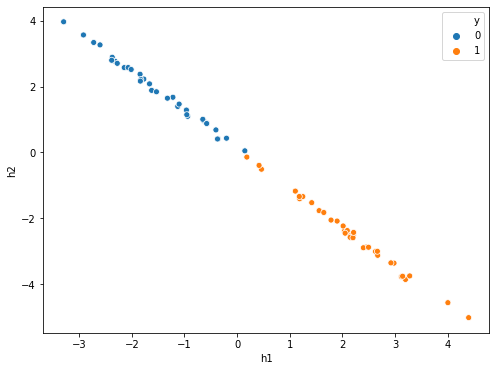

In [51]:
w = model.layers[0].get_weights()[0]
b = model.layers[0].get_weights()[1]
df2 = df[['x1','x2']]
arr = df2.to_numpy()
print(f'w shape {w.shape}, arr shape {arr.shape}, b shape {b.shape}')
print(w)
r = np.dot(arr, w)
r = r + b
# retrieve the first column of r
df['h1'] = r[:,0]
# retrieve the second column of r
df['h2'] = r[:,1]
plt.figure(figsize=(8,6))
sns.scatterplot(x = df.h1, y = df.h2, hue = df.y)
# apply the sigmoid function to all the elements in r
s = tensorflow.keras.activations.sigmoid(r)
df['sigmoidh1'] = s[:,0]
df['sigmoidh2'] = s[:,1]
df.head(8)

上圖畫出了 hidden layer 中 $h_1$ 以及 $h_2$ 的結果。  
注意，$h_1$ 及 $h_2$ 還沒有經過 activation function 的轉換。  
可以看出，資料經過了線性變換，被拉成一條線。

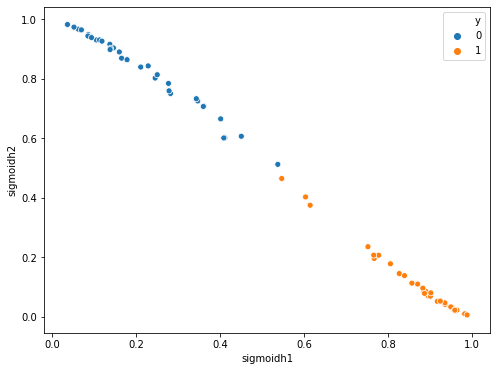

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.sigmoidh1, y=df.sigmoidh2, hue=df.y)

上圖將經過 activation function 轉換過的「非線性」的結果畫出。  
可以看出資料有被扭曲，可以比較清楚的看出兩種資料的分界。

The above figure draws the data points that are transformed by the activation function.  
We can see that the data space is *twisted*, and we can use a straight line to separate the data points into two classes.